In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

# Compile the library (won't run if nothing has changed)
import os
cwd = os.getcwd()
os.chdir('../python/')
import subprocess
out = subprocess.run(["python", "setup.py", "build_ext", "--inplace"], stdout=subprocess.PIPE)
os.chdir(cwd)

import sys
sys.path.append('../python/')
import gropt
from helper_utils import *

%matplotlib inline

In [2]:
def make_testcase_simpdiff(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, dt=-1, N = -1):
    if (dt < 0) and (N < 0):
        print('ERROR: dt or N needs to be set for test case')
    elif (dt > 0):
        start = timer()
        G, dd = gropt.run_diffkernel_fixdt(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, dt=dt)
        end = timer()
    elif (N > 0):
        start = timer()
        G, dd = gropt.run_diffkernel_fixN(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, N0=N)
        end = timer()
    
    testcase = {}
    
    # This is referencing the testcase setup, not the software version
    testcase[u'version'] = 'diff_v1'
    
    params_in = {}
    params_in[u'gmax'] = gmax
    params_in[u'smax'] = smax
    params_in[u'MMT'] = MMT
    params_in[u'TE'] = TE
    params_in[u'T_readout'] = T_readout
    params_in[u'T_90'] = T_90
    params_in[u'T_180'] = T_180
    params_in[u'diffmode'] = diffmode
    params_in[u'dt'] = dt
    params_in[u'N'] = N
    
    
    testcase[u'params_in'] = params_in
    testcase[u'G'] = G
    testcase[u'dd'] = dd[:32]
    testcase[u'compute_time'] = end-start
    
    return testcase
    

In [3]:
# Repeat entire script with different MMT
MMT = 2
all_testcase = []

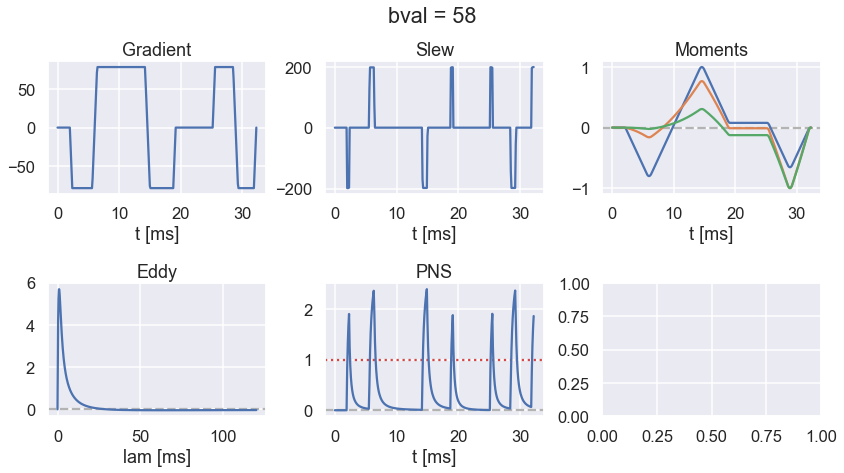

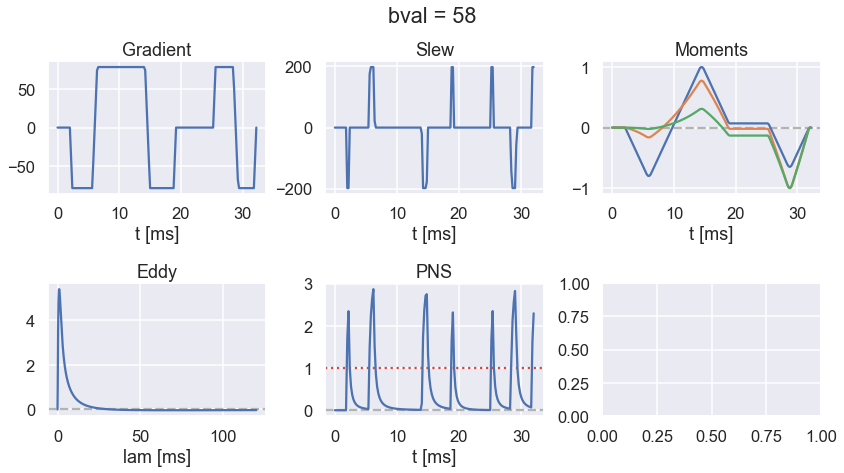

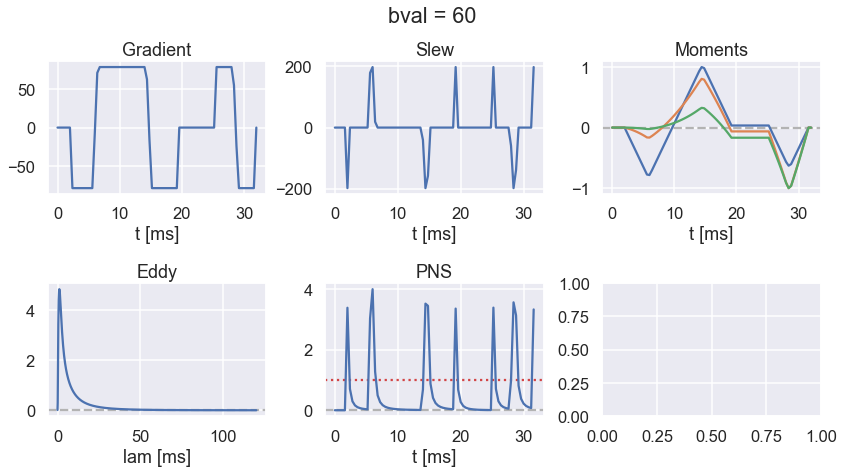

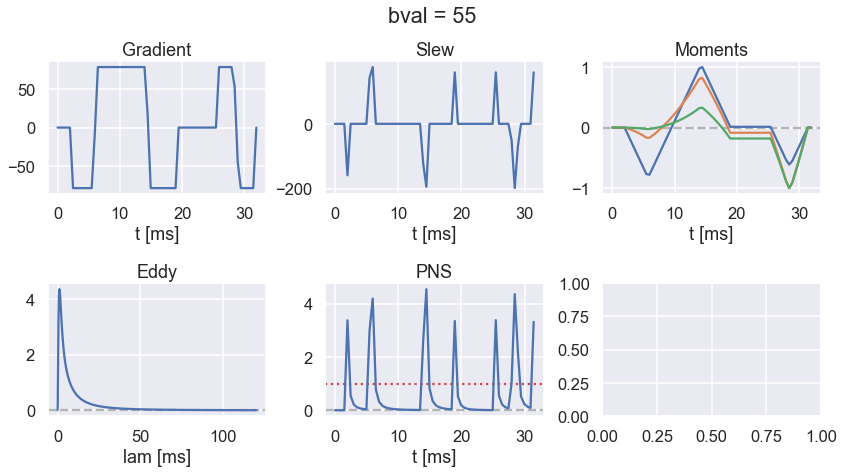

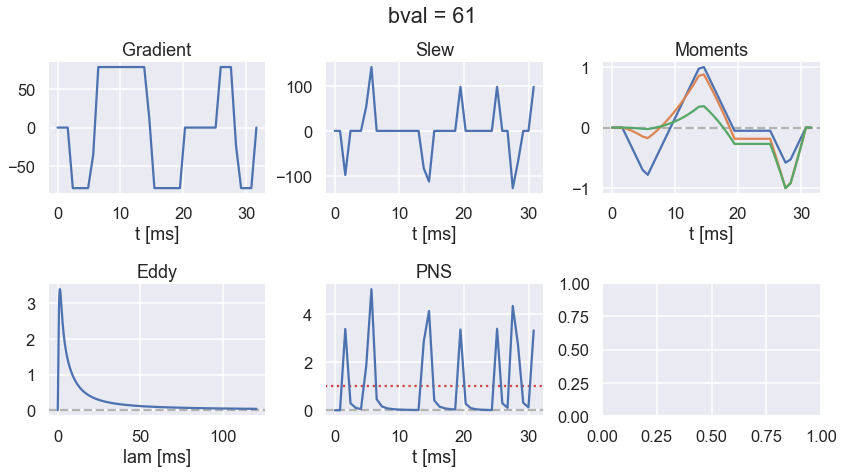

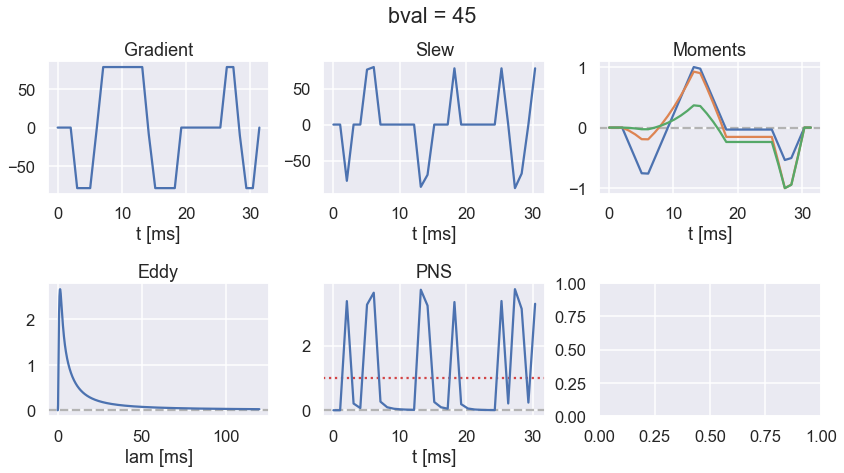

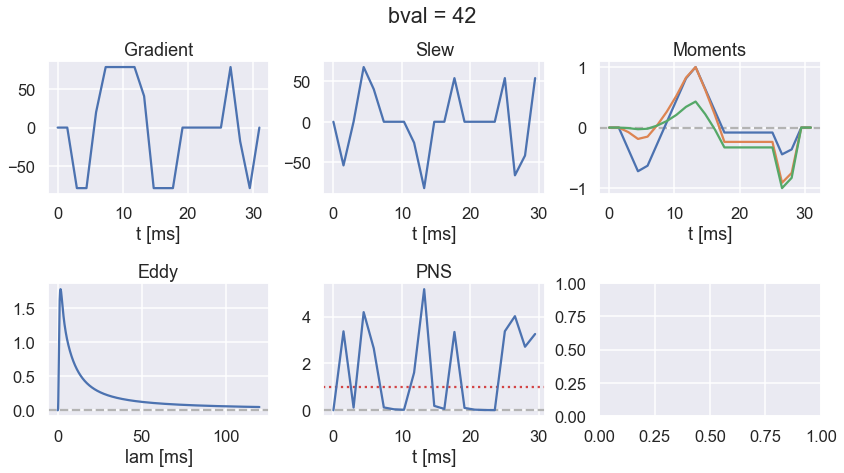

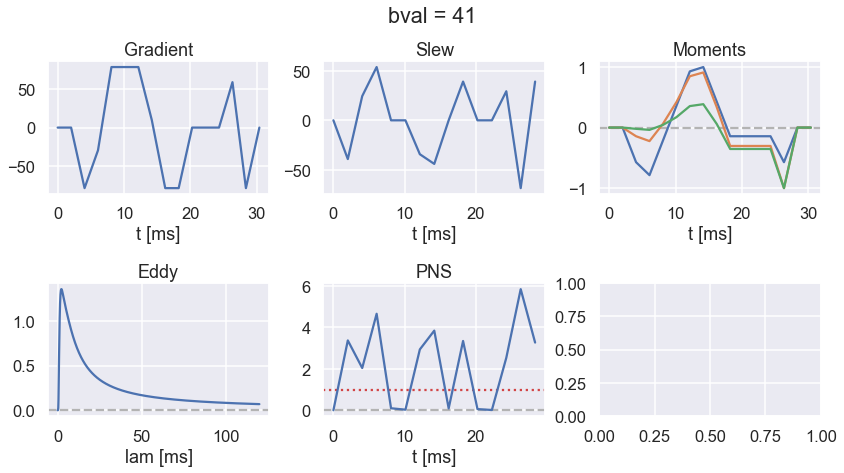

In [4]:
gmax = .08      # Gmax in [T/s]
smax = 200      # Slew max im [T/m/s]
TE = 44.4       # TE in [ms]
T_readout = 12  # [ms]
T_90 = 2        # [ms]
T_180 = 6       # [ms]
diffmode = 2    # diffmode =1 for beta-max, =2 for b-val max
# dt = 0.2e-3     # gradient raster time in [s]

dt_range = np.array([.1, .2, .4, .5, .8, 1.0, 1.5, 2.0]) * 1.0e-3

for dt in dt_range:

    testcase = make_testcase_simpdiff(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, dt=dt)
    all_testcase.append(testcase)
    plot_waveform(testcase['G'], TE, T_readout)



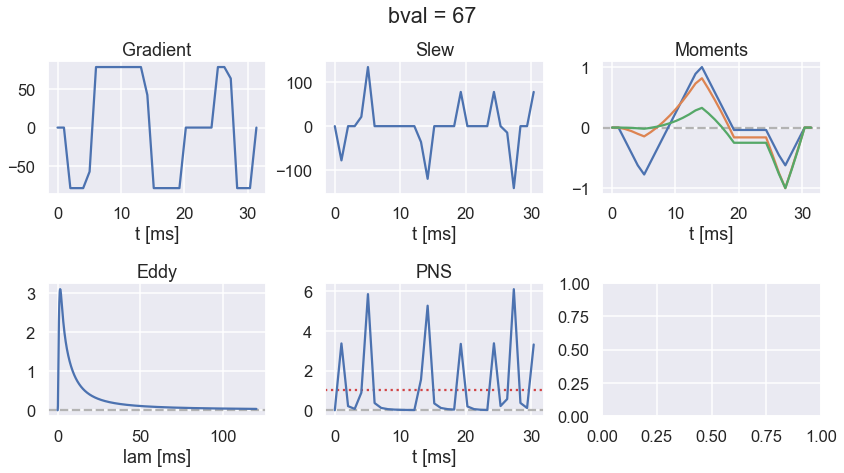

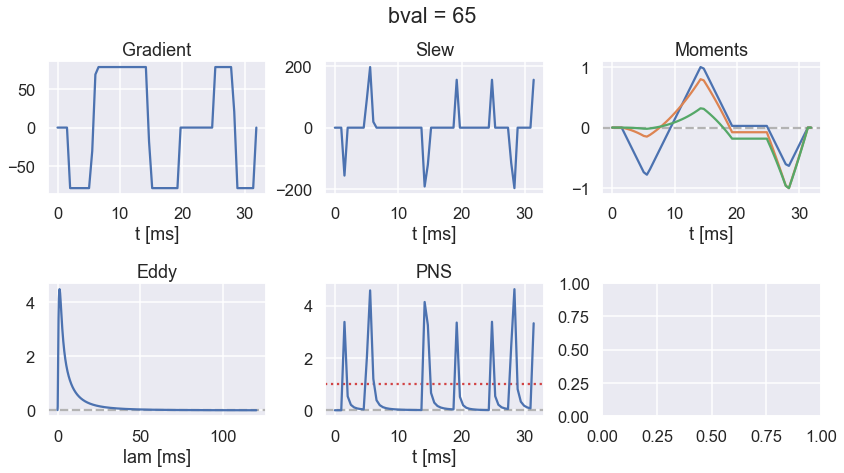

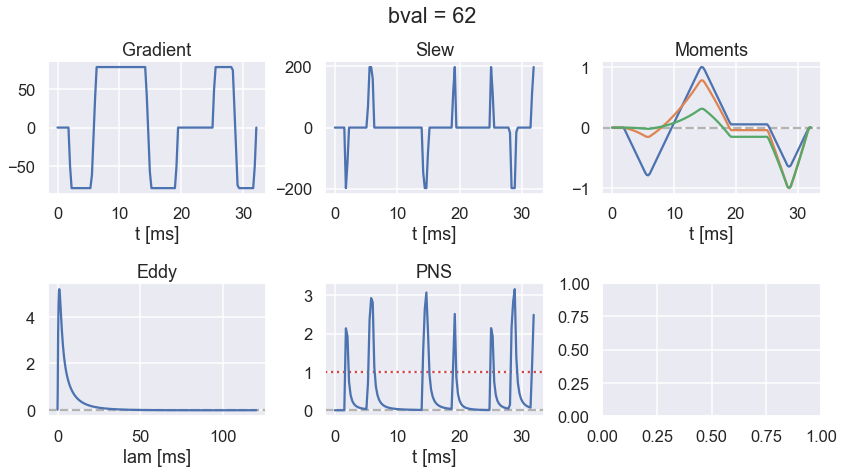

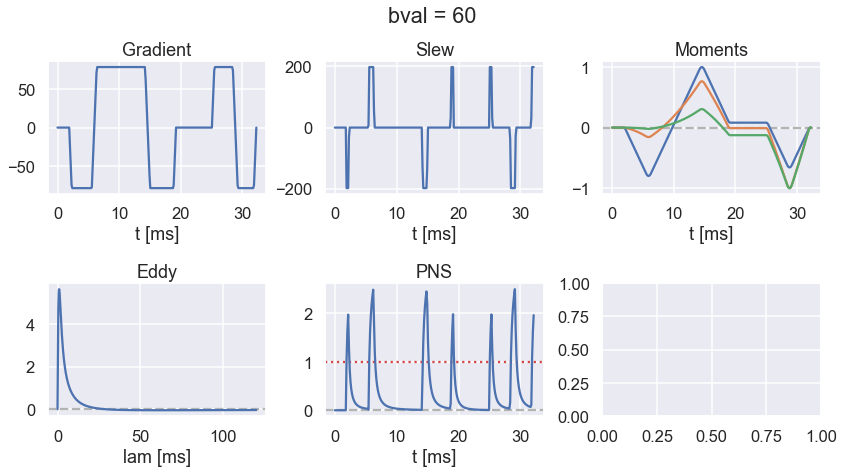

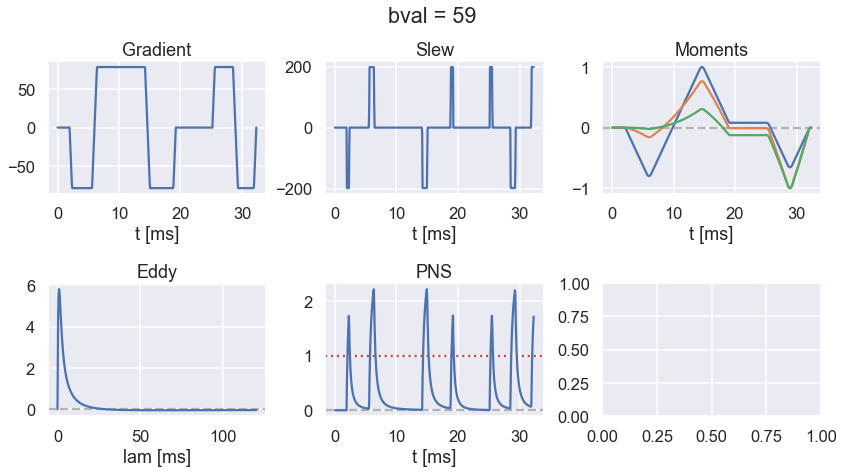

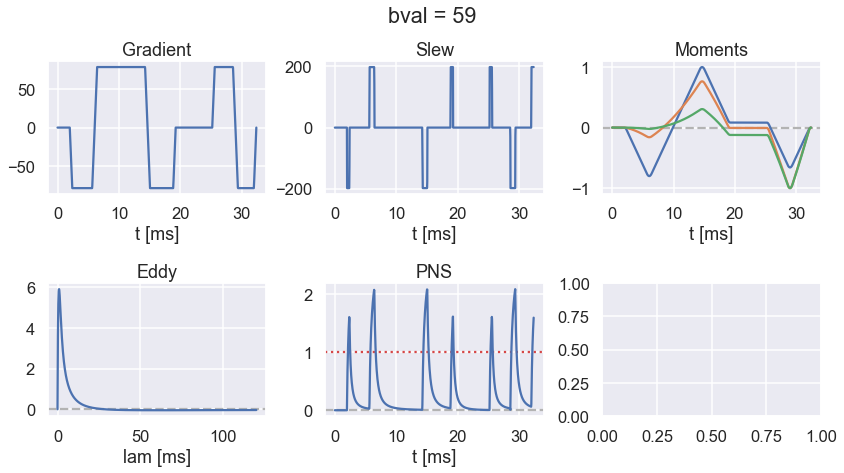

In [5]:
N_range = np.array([32, 64, 128, 256, 512, 1024])

for N in N_range:

    testcase = make_testcase_simpdiff(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, N=N)
    all_testcase.append(testcase)
    plot_waveform(testcase['G'], TE, T_readout)
    

C:\Users\Mike\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


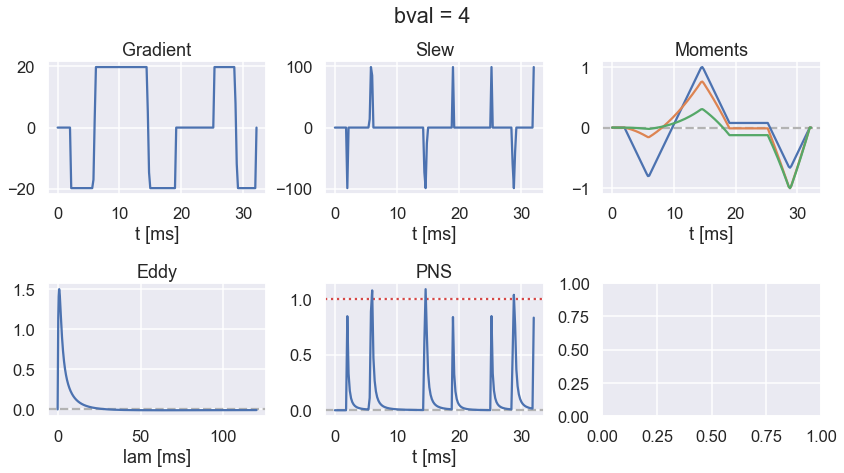

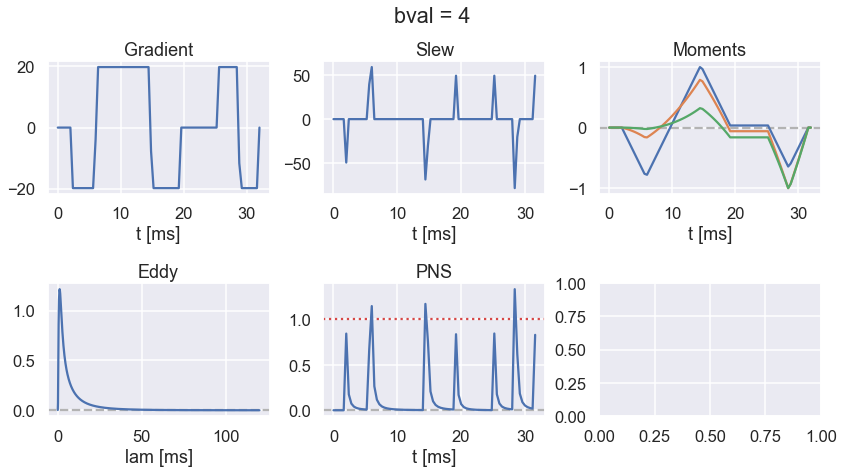

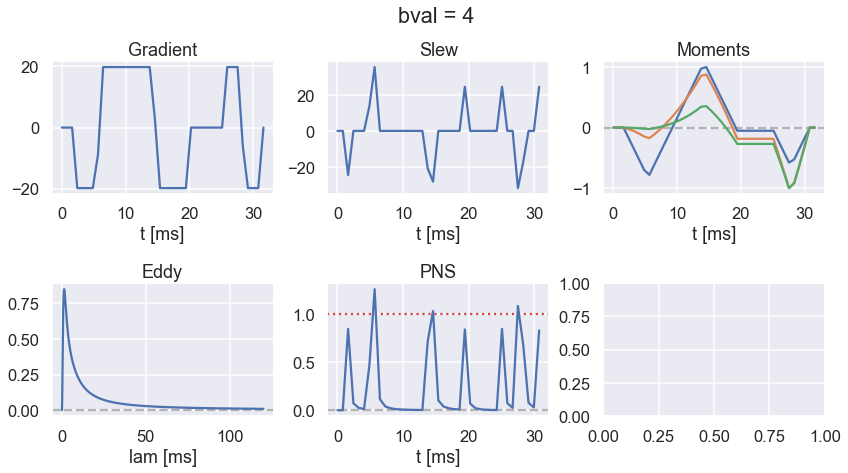

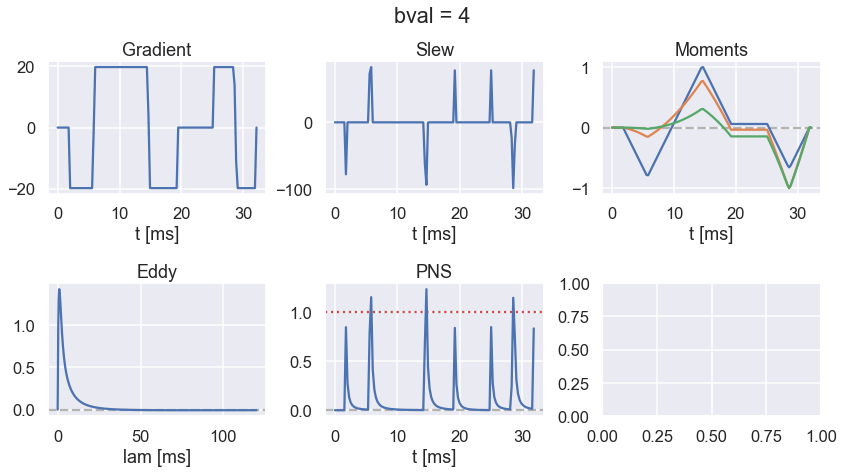

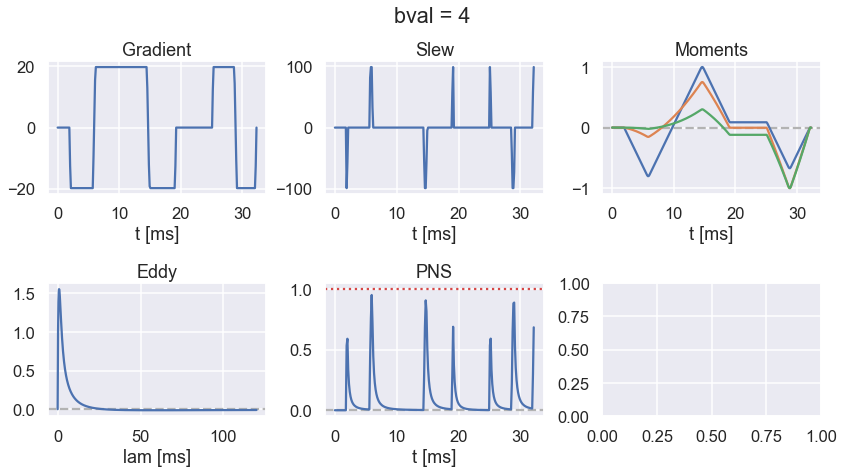

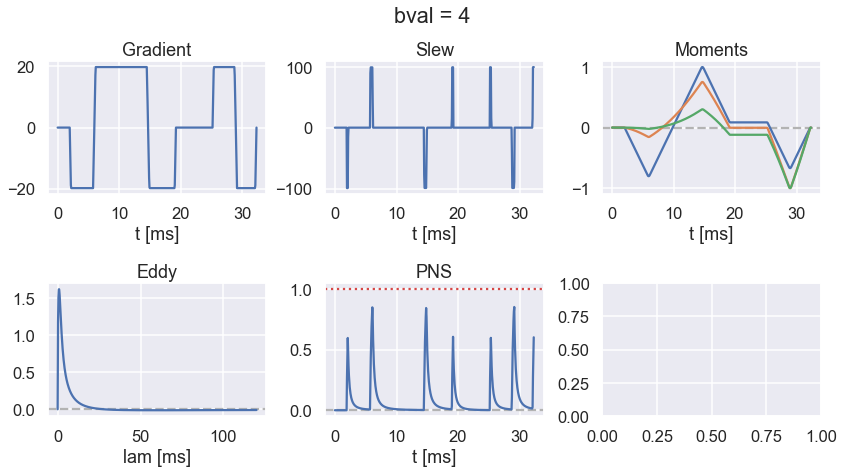

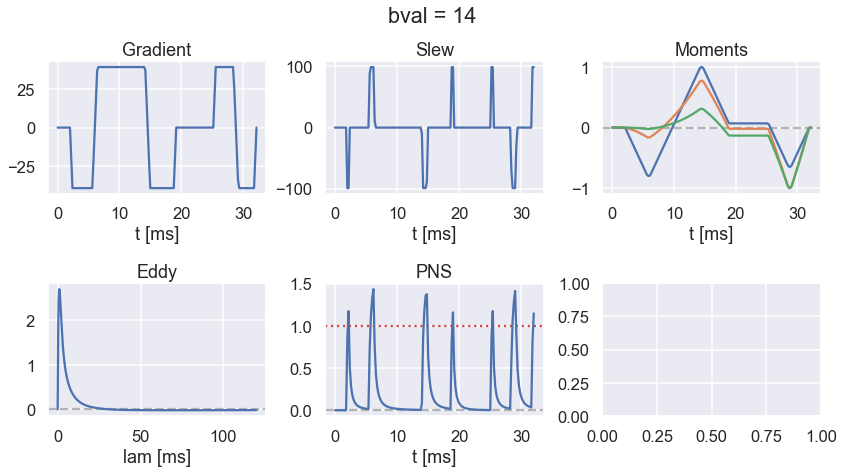

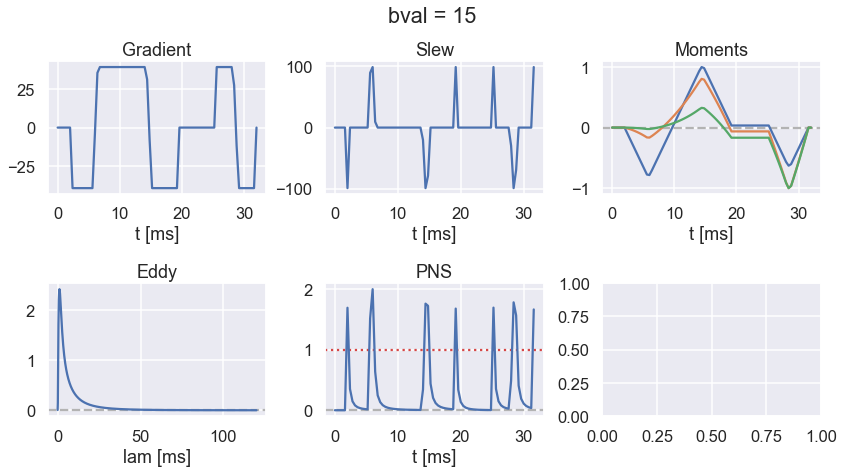

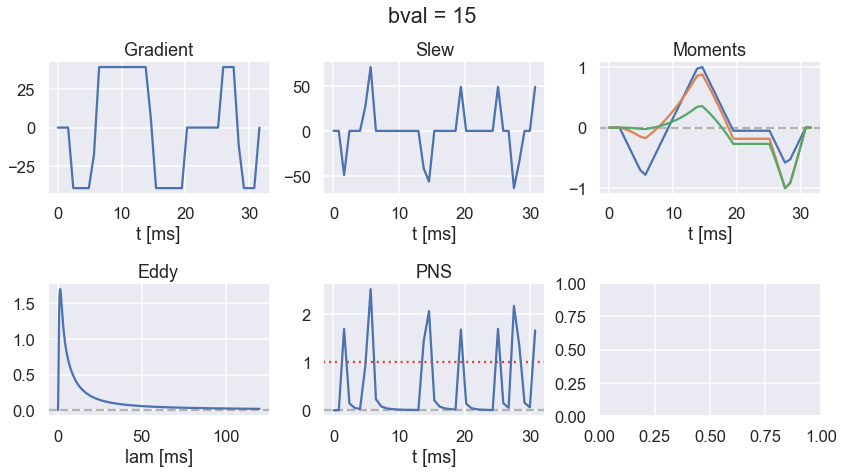

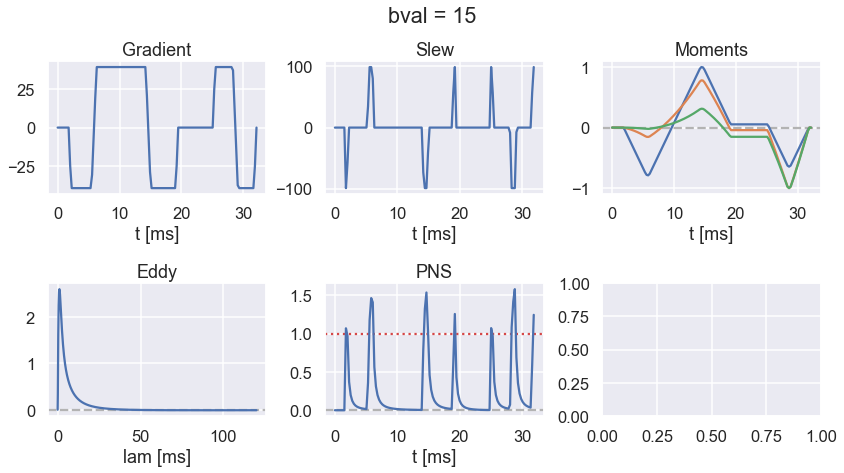

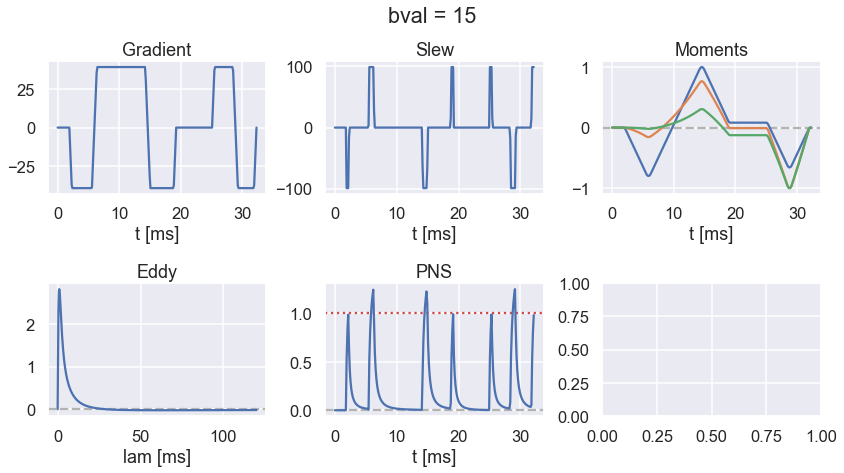

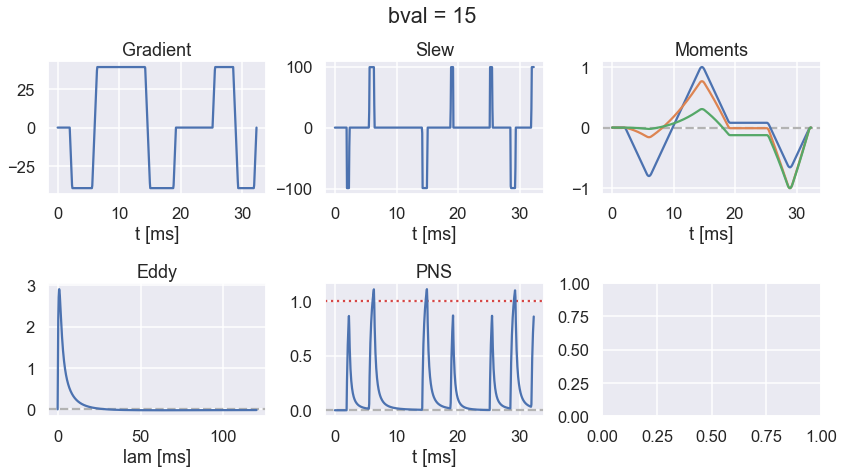

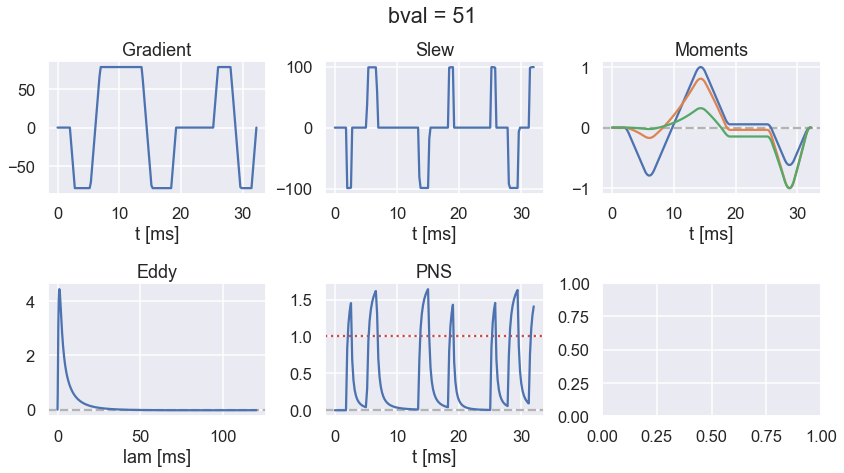

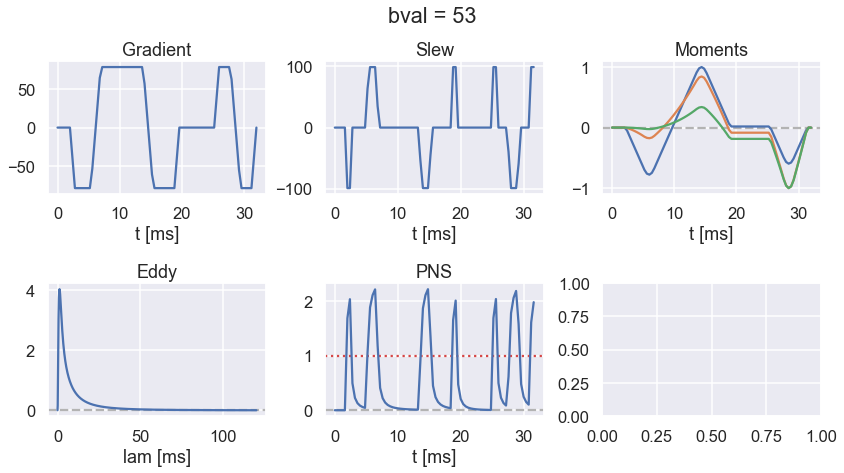

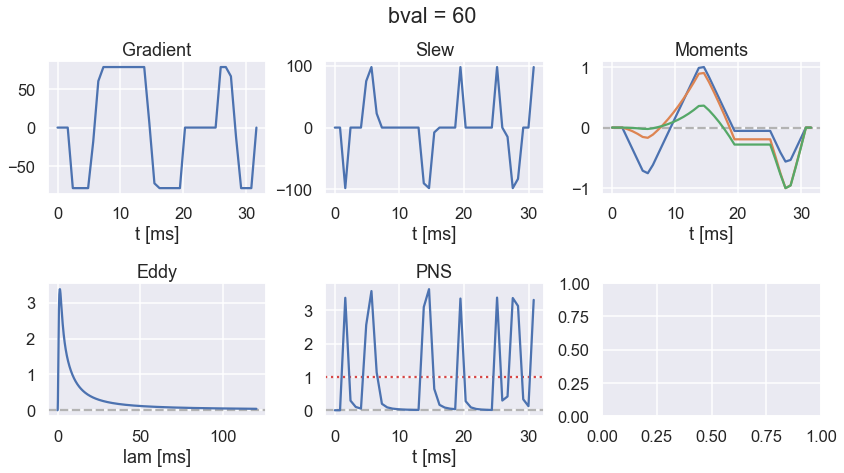

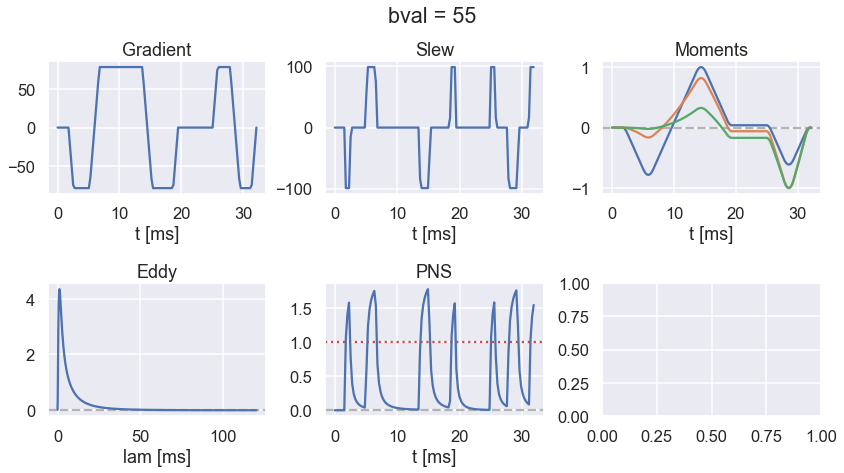

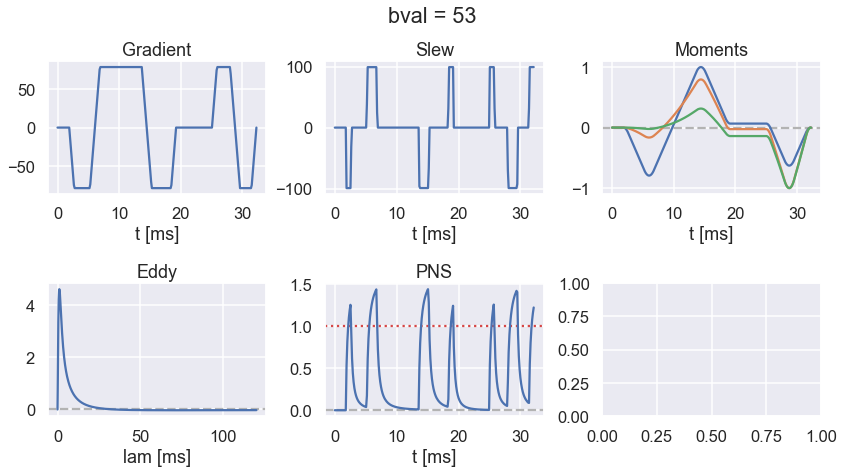

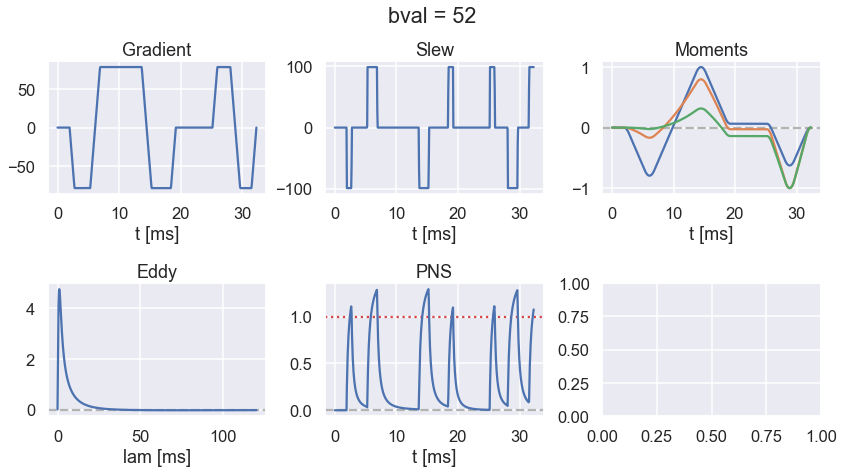

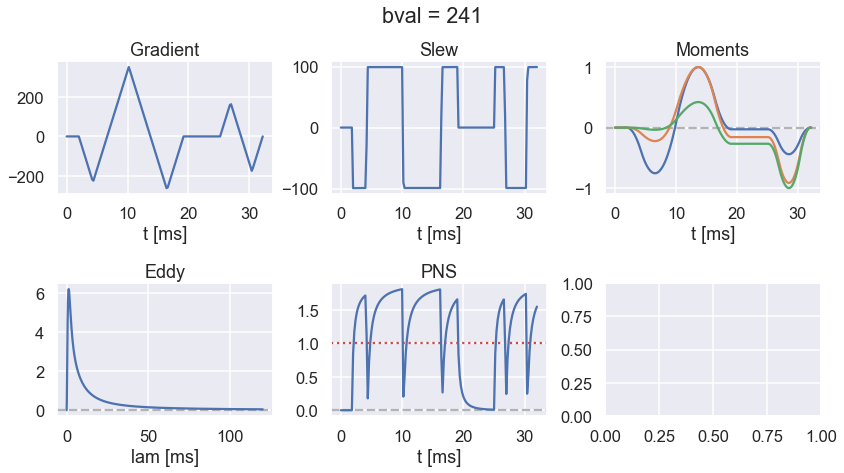

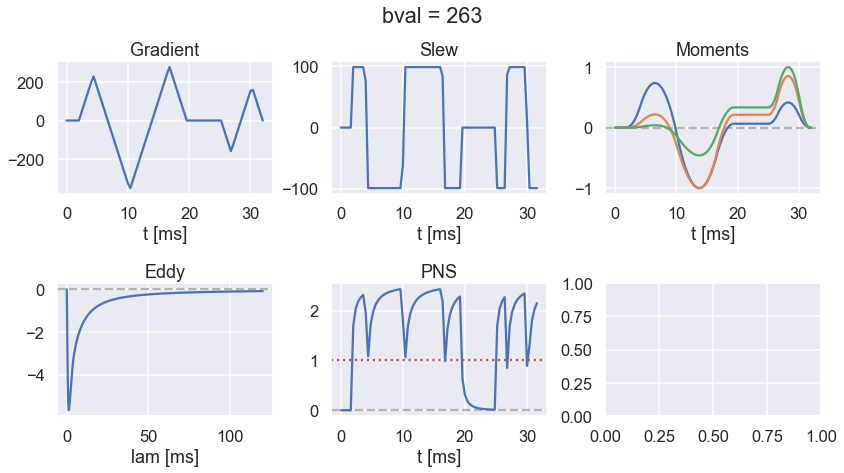

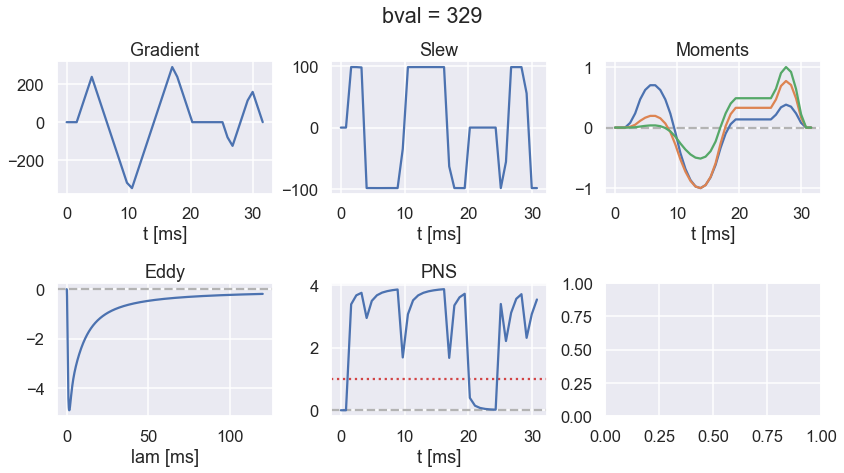

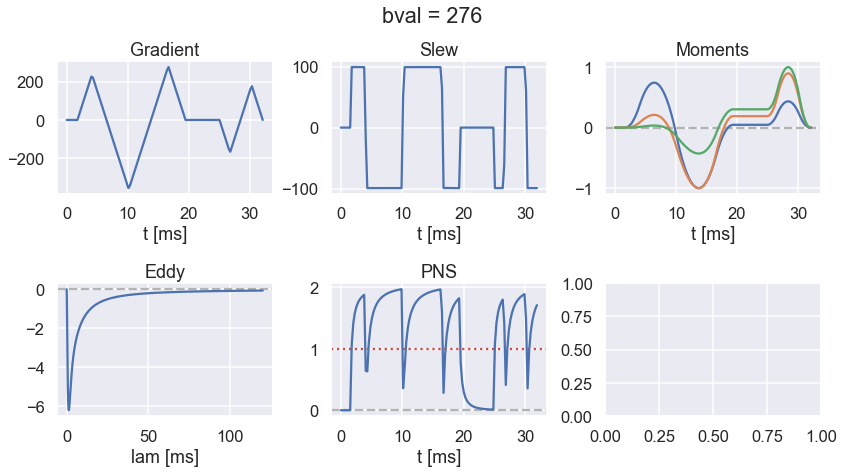

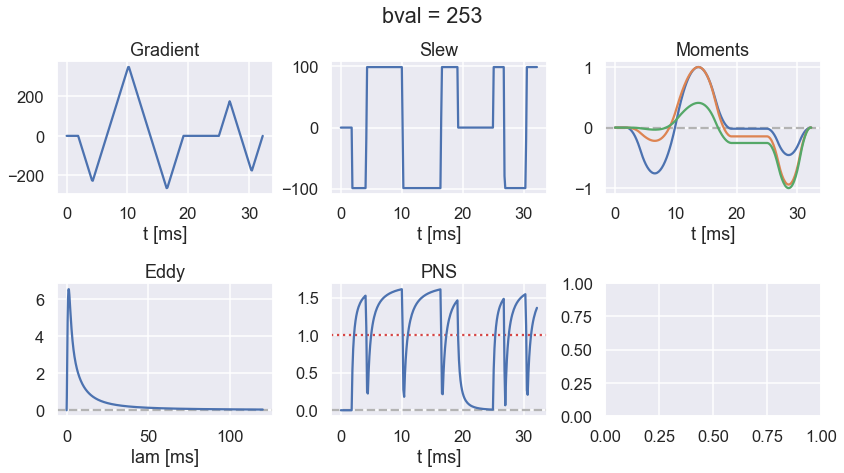

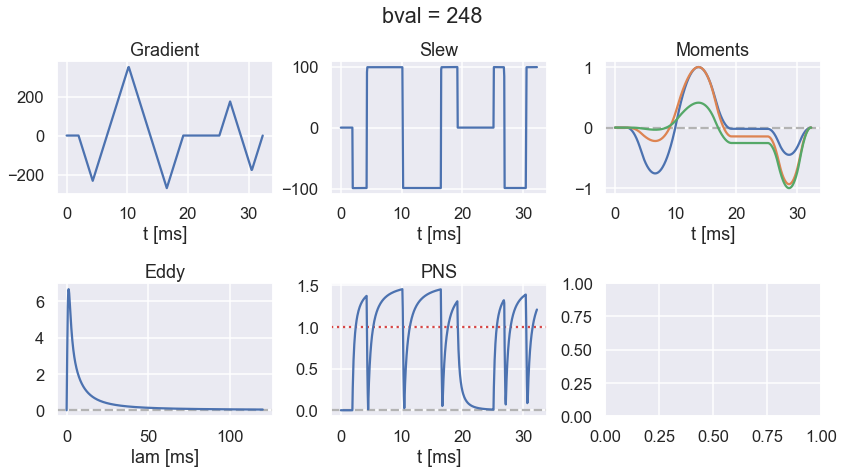

In [6]:
gmax = .08      # Gmax in [T/s]
smax = 100      # Slew max im [T/m/s]
TE = 44.4       # TE in [ms]
T_readout = 12  # [ms]
T_90 = 2        # [ms]
T_180 = 6       # [ms]
diffmode = 2    # diffmode =1 for beta-max, =2 for b-val max


for gmax in [.02, .04, .08, 1.2]:
    
    dt_range = np.array([.2, .4, .8]) * 1.0e-3
    for dt in dt_range:

        testcase = make_testcase_simpdiff(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, dt=dt)
        all_testcase.append(testcase)
        plot_waveform(testcase['G'], TE, T_readout)

    N_range = np.array([128, 256, 512])
    for N in N_range:

        testcase = make_testcase_simpdiff(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, N=N)
        all_testcase.append(testcase)
        plot_waveform(testcase['G'], TE, T_readout)

C:\Users\Mike\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


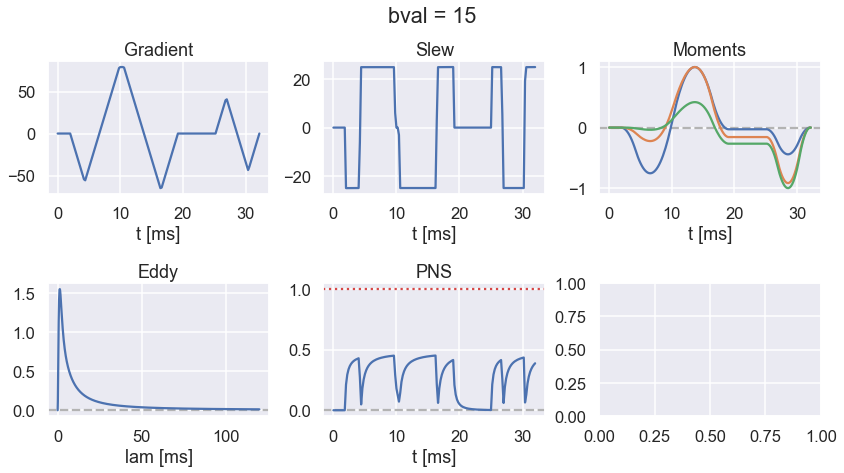

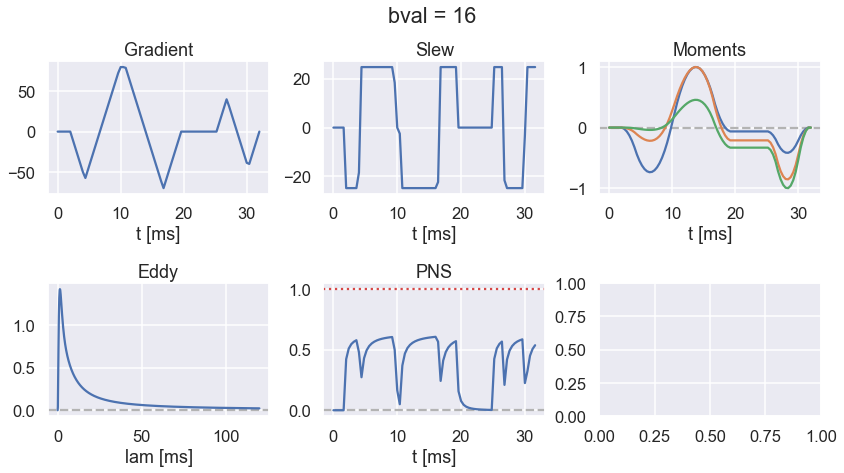

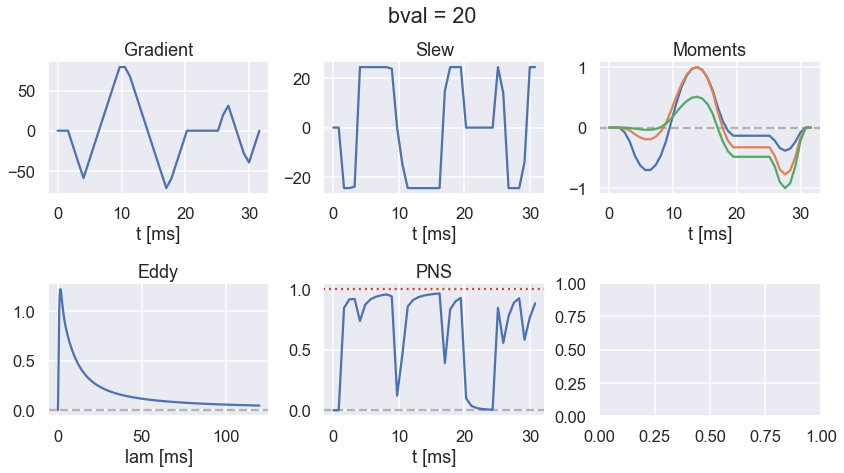

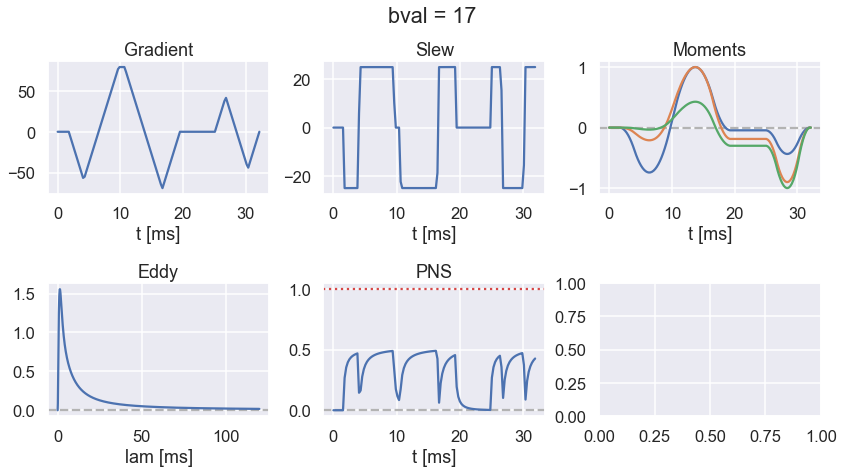

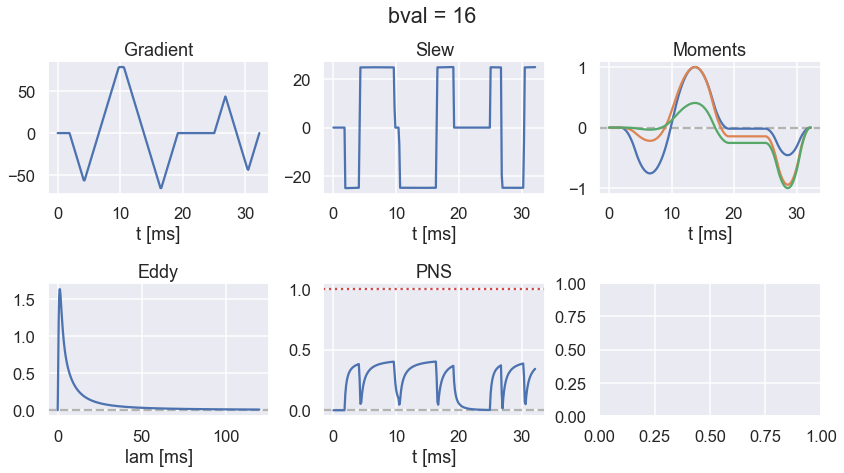

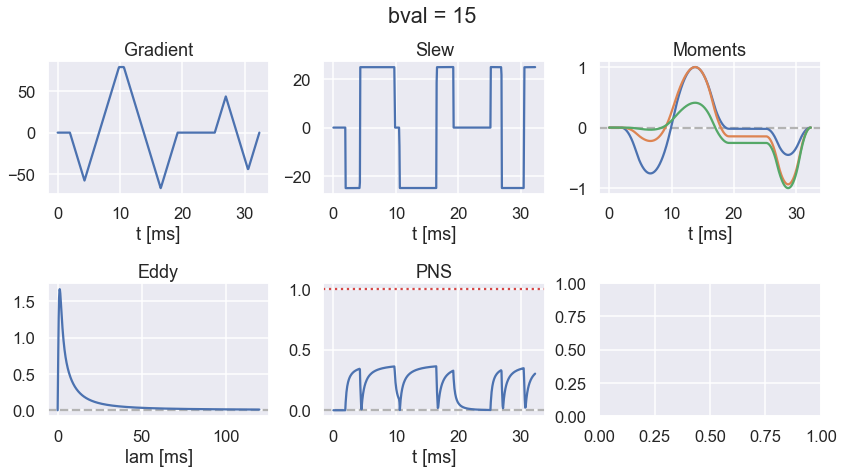

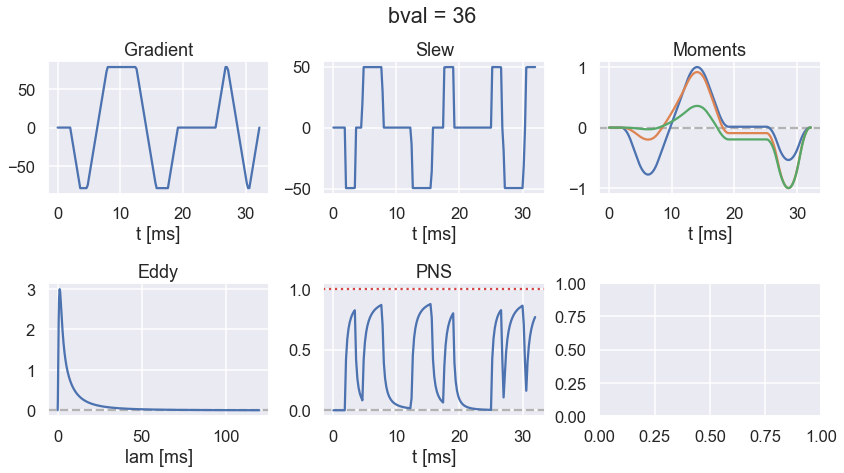

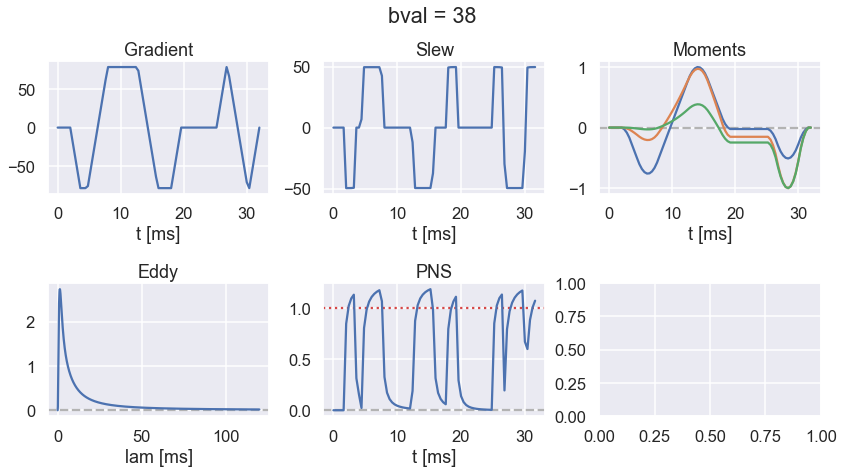

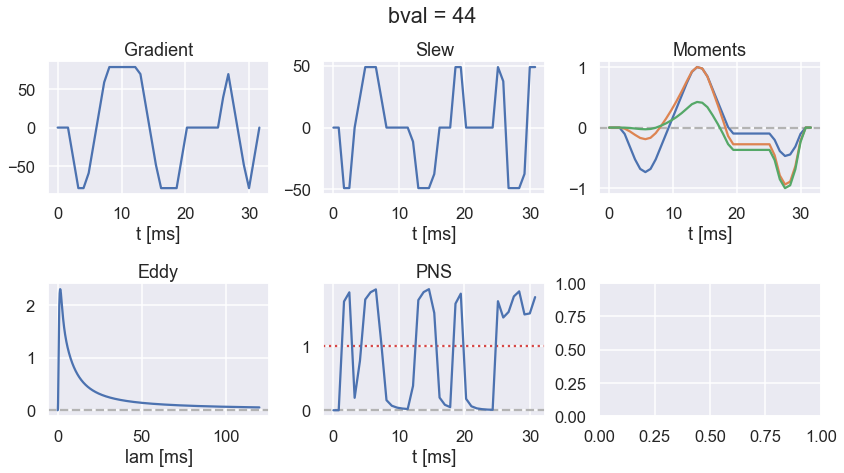

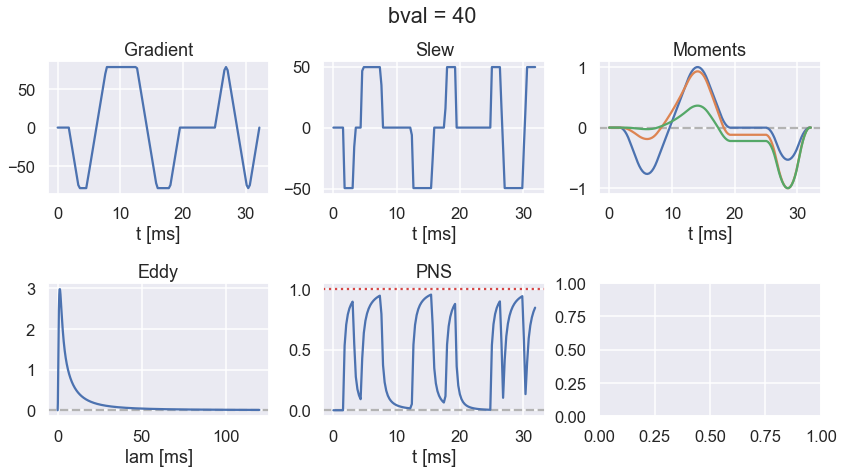

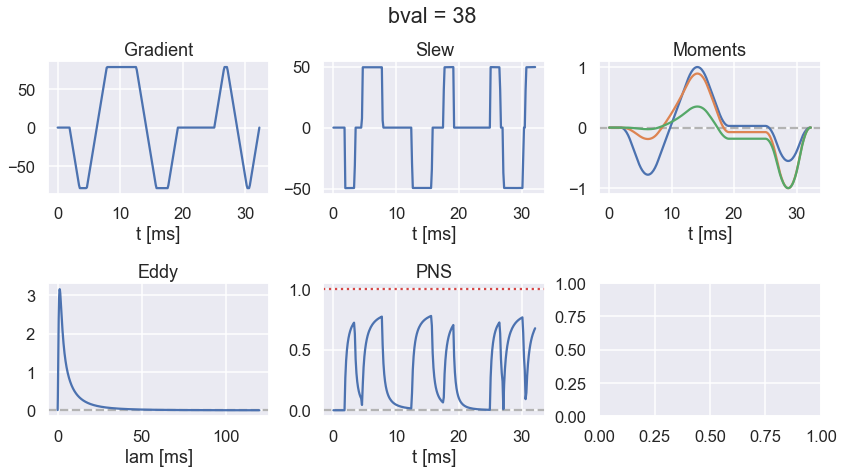

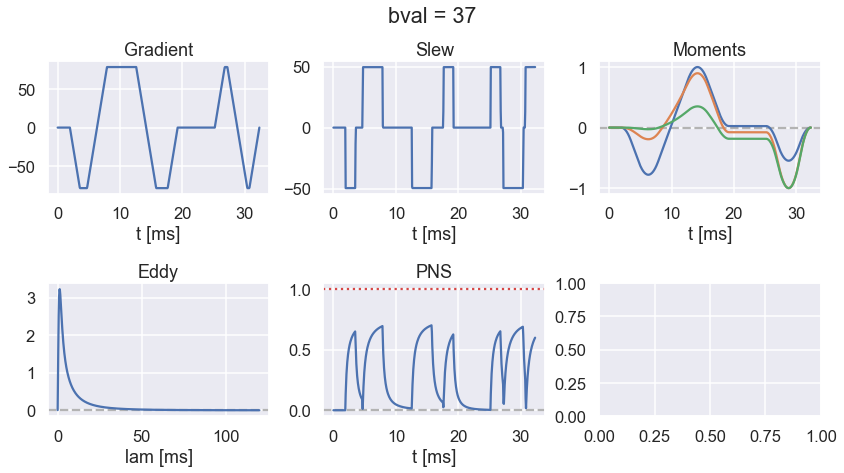

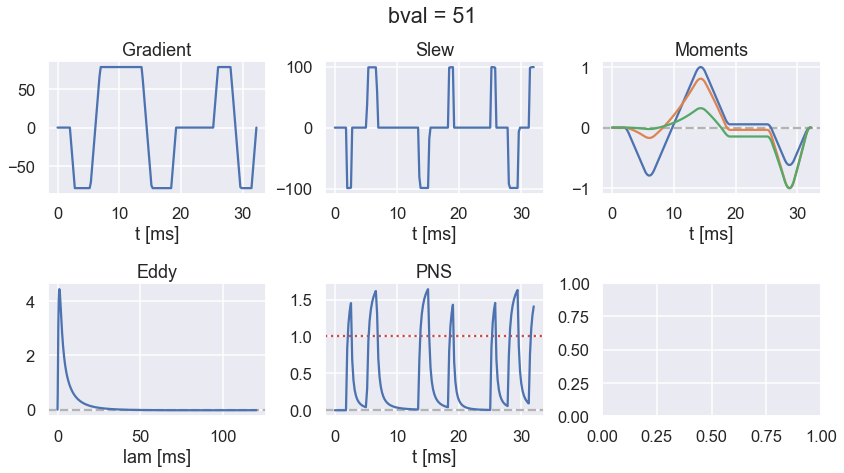

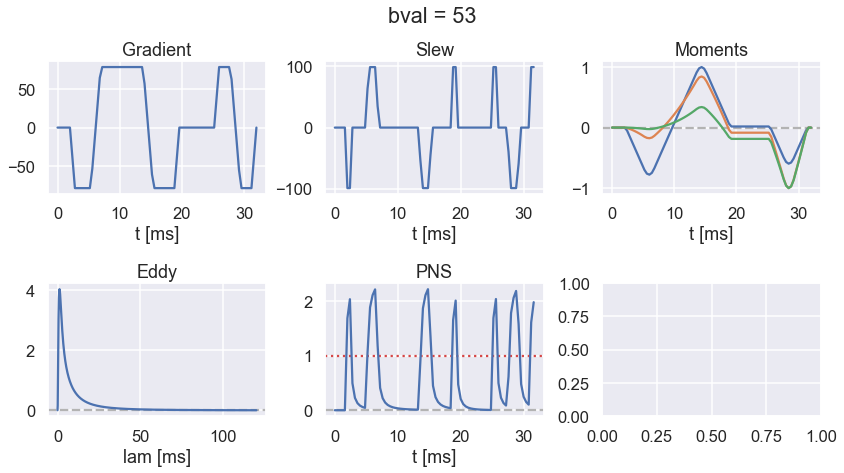

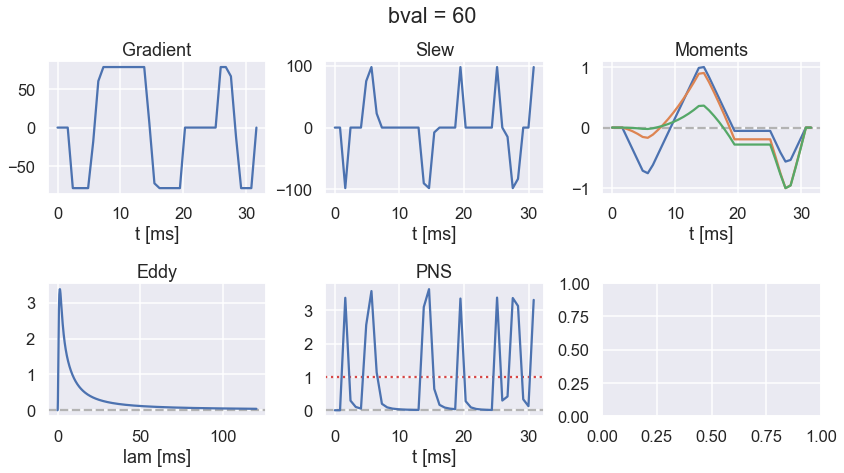

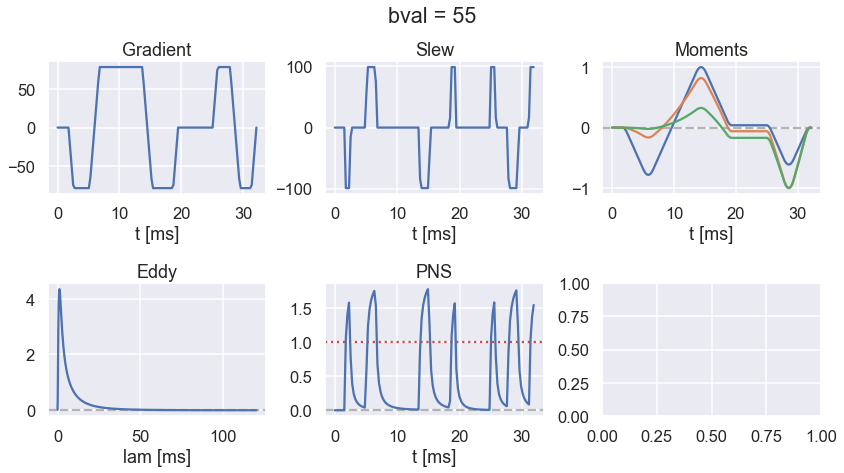

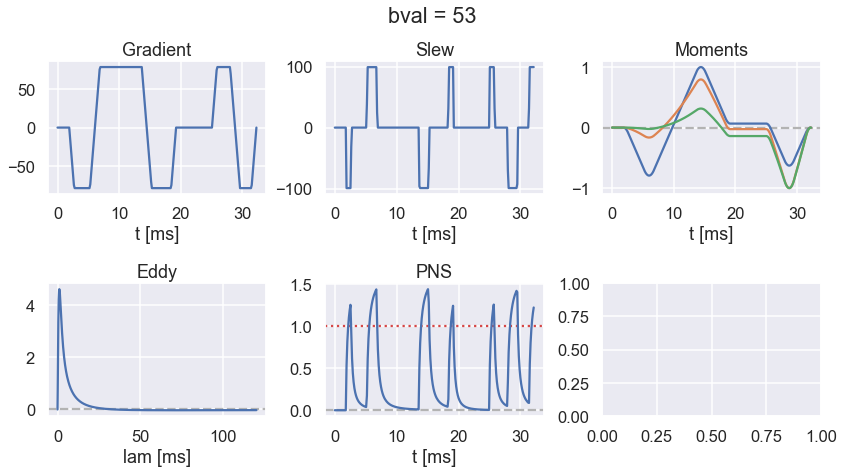

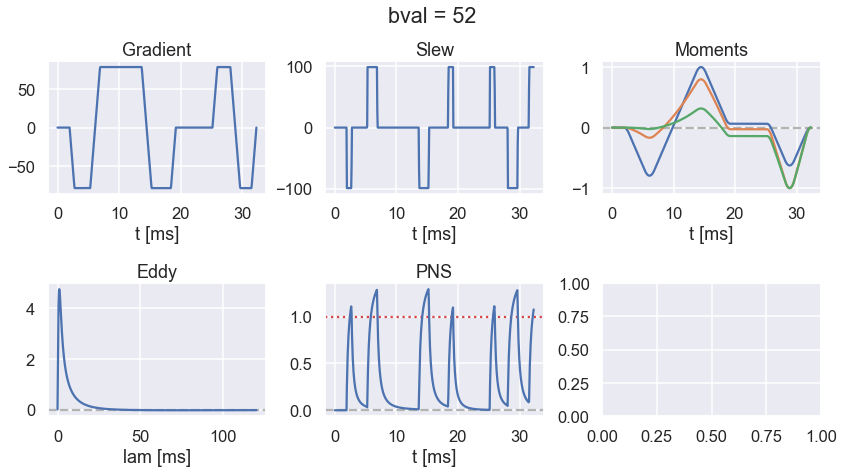

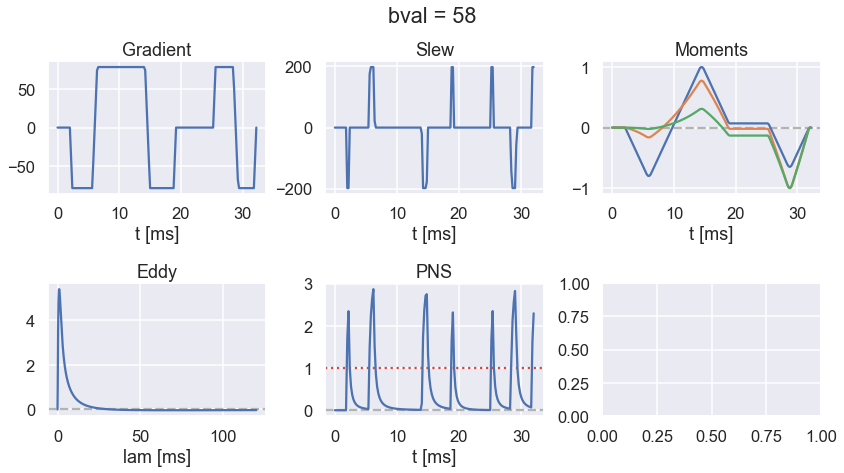

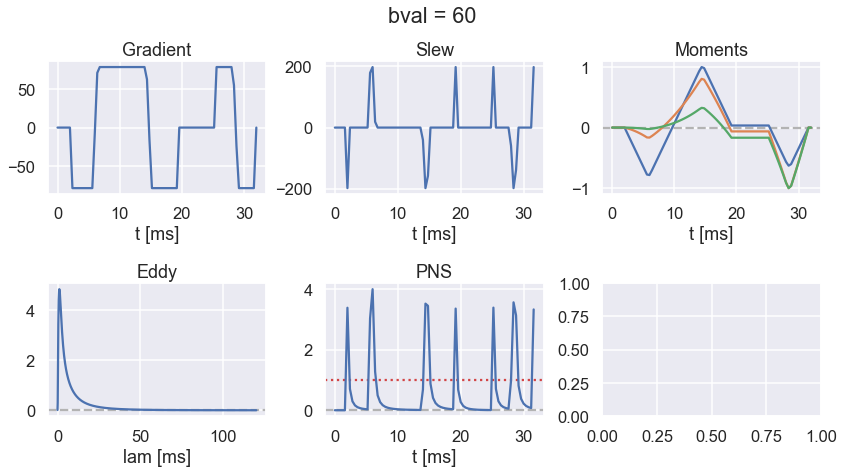

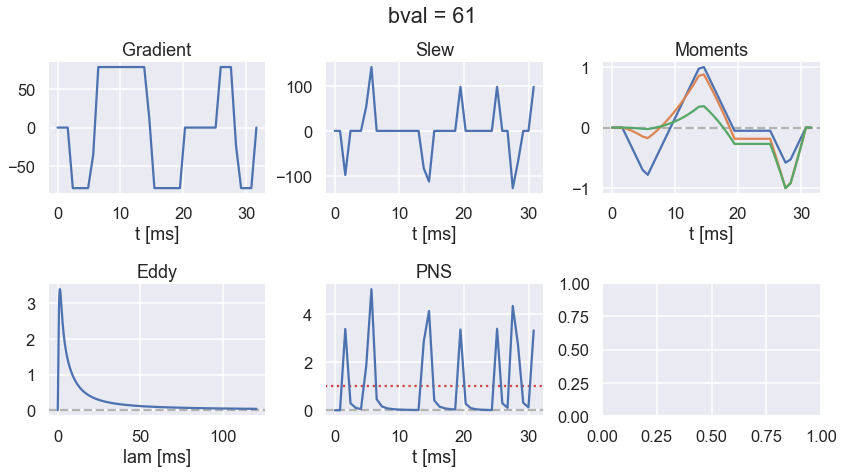

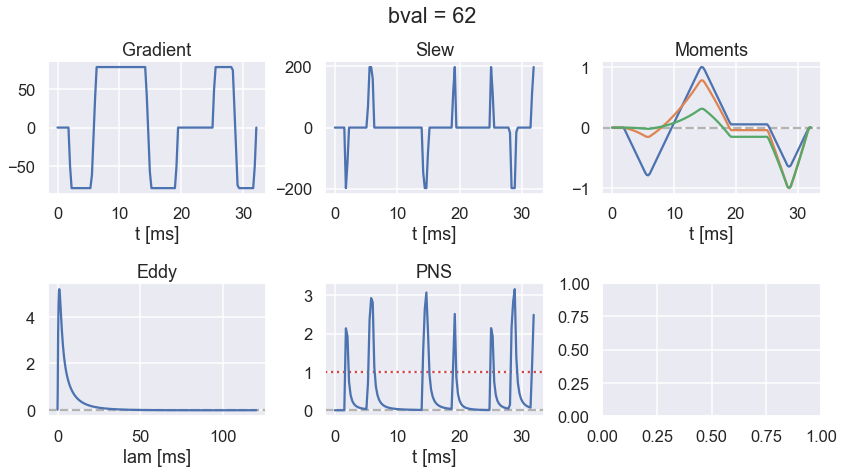

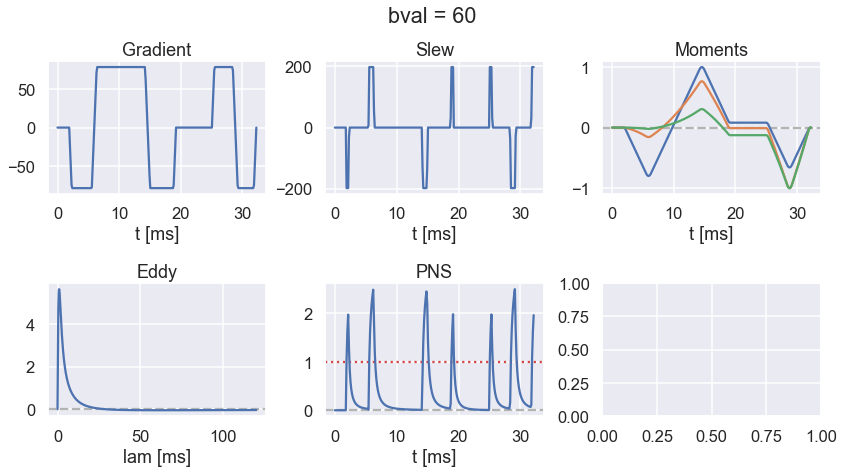

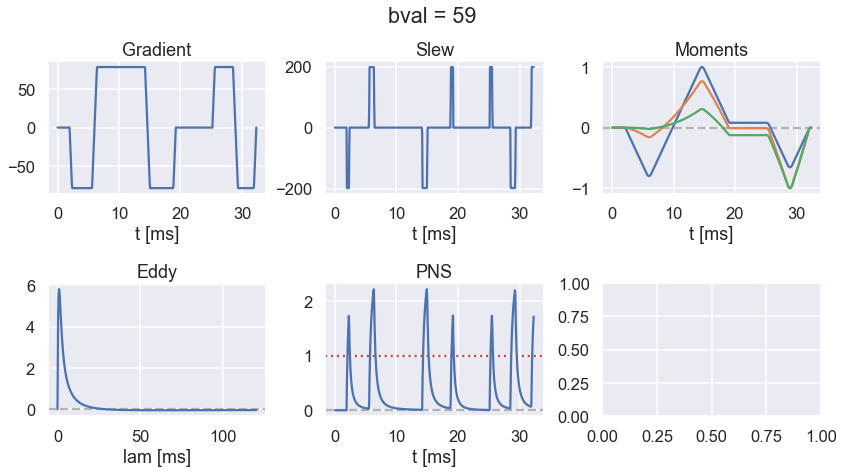

In [7]:
gmax = .08      # Gmax in [T/s]
smax = 50      # Slew max im [T/m/s]
TE = 44.4       # TE in [ms]
T_readout = 12  # [ms]
T_90 = 2        # [ms]
T_180 = 6       # [ms]
diffmode = 2    # diffmode =1 for beta-max, =2 for b-val max


for smax in [25, 50, 100, 200]:
    
    dt_range = np.array([.2, .4, .8]) * 1.0e-3
    for dt in dt_range:

        testcase = make_testcase_simpdiff(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, dt=dt)
        all_testcase.append(testcase)
        plot_waveform(testcase['G'], TE, T_readout)

    N_range = np.array([128, 256, 512])
    for N in N_range:

        testcase = make_testcase_simpdiff(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, N=N)
        all_testcase.append(testcase)
        plot_waveform(testcase['G'], TE, T_readout)

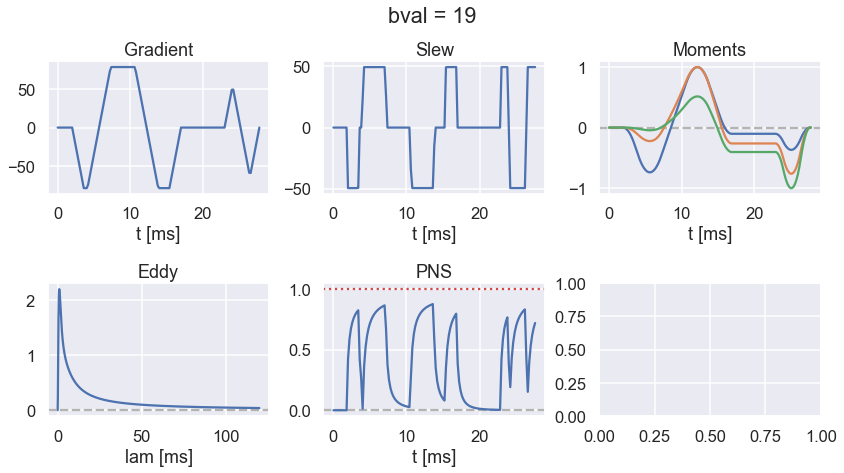

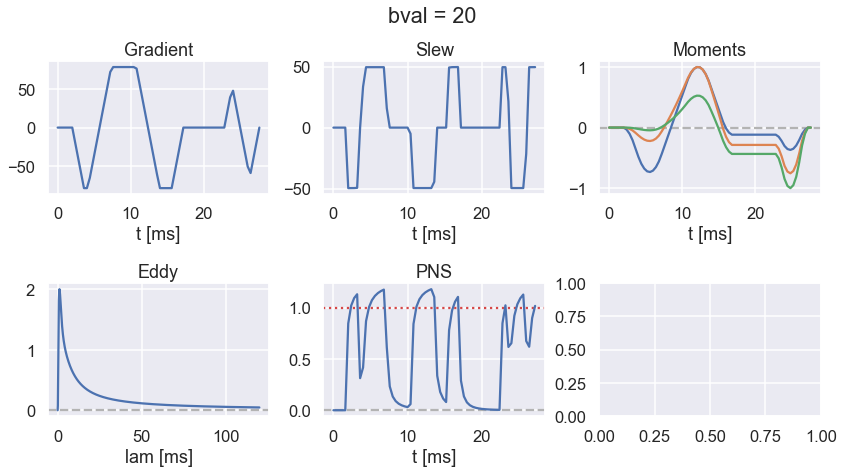

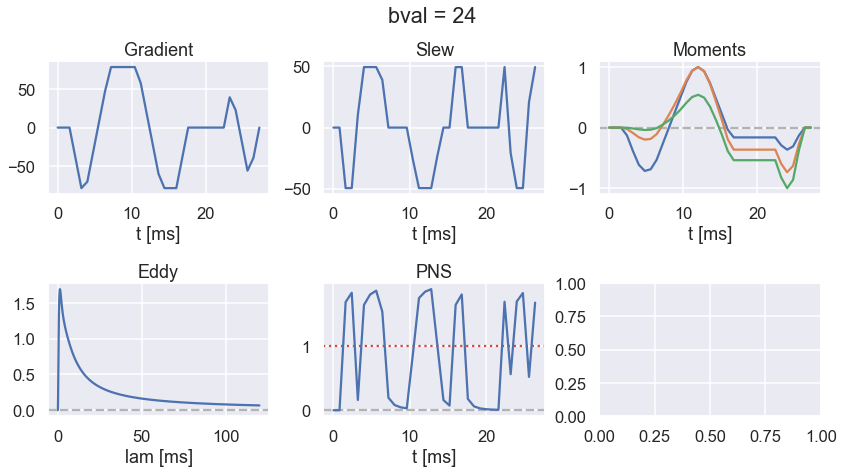

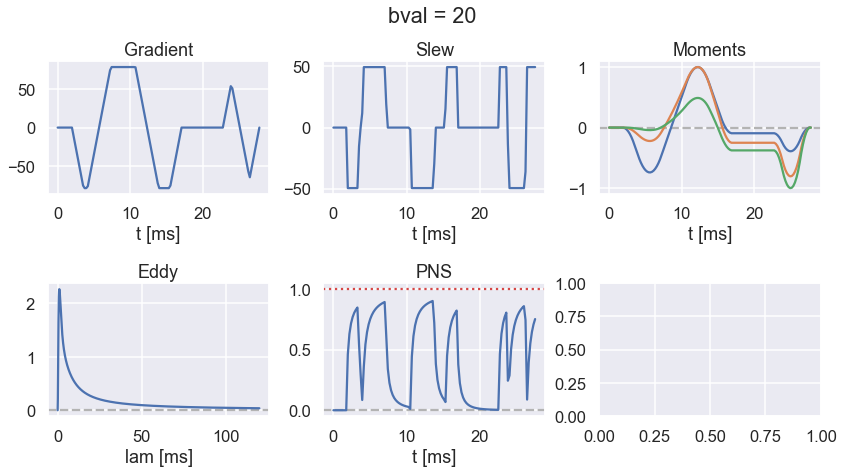

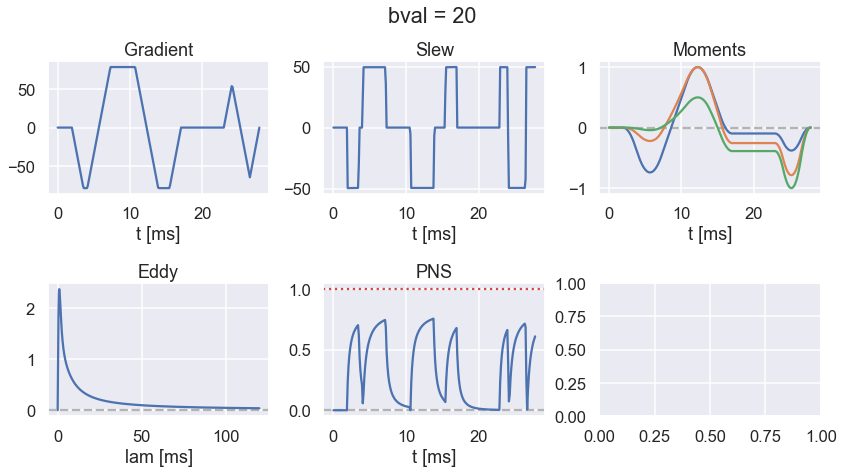

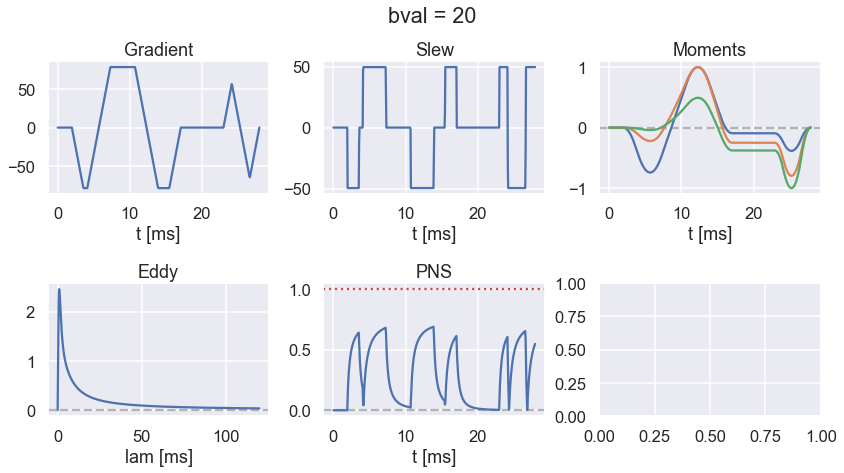

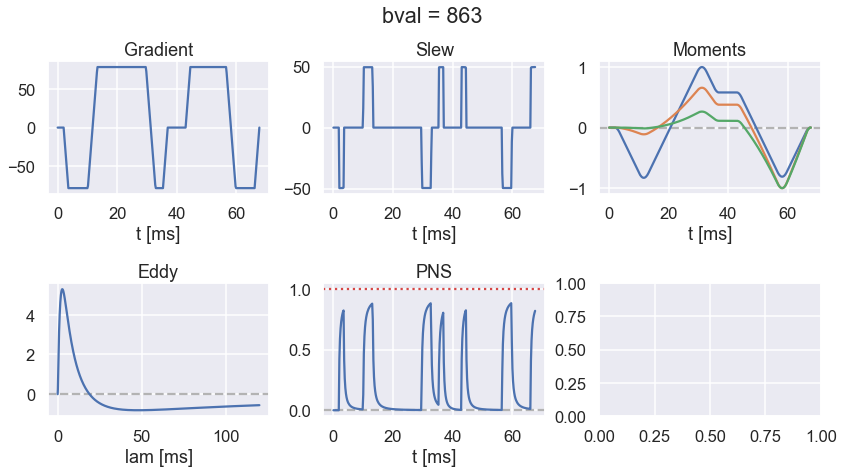

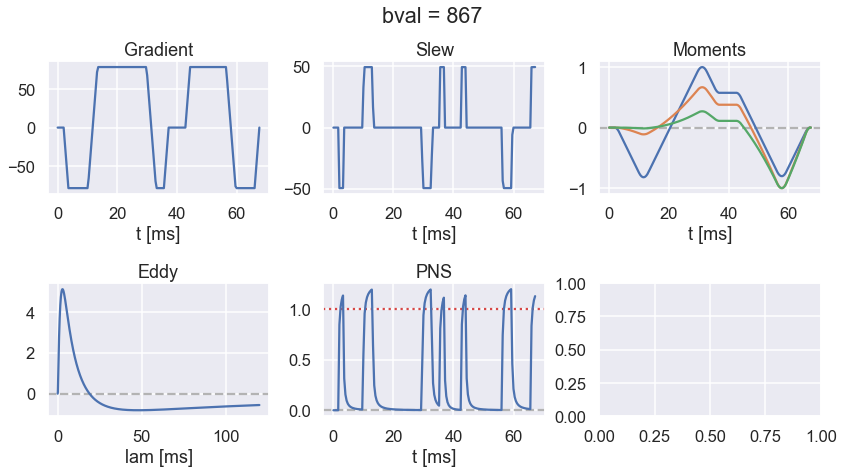

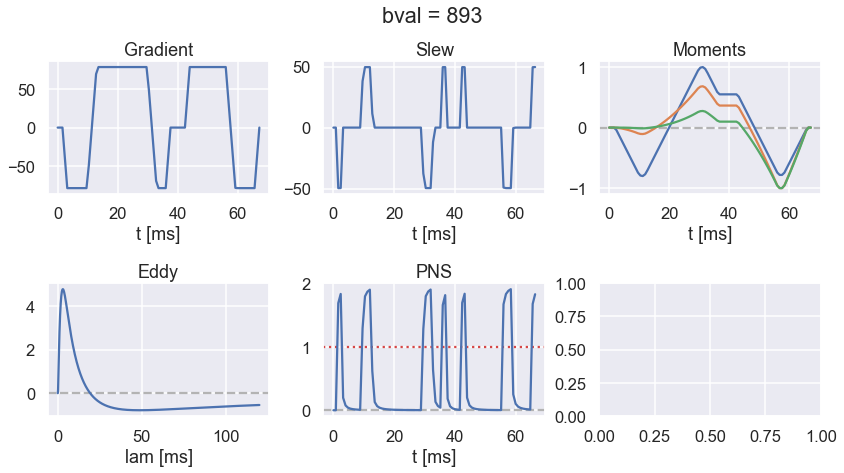

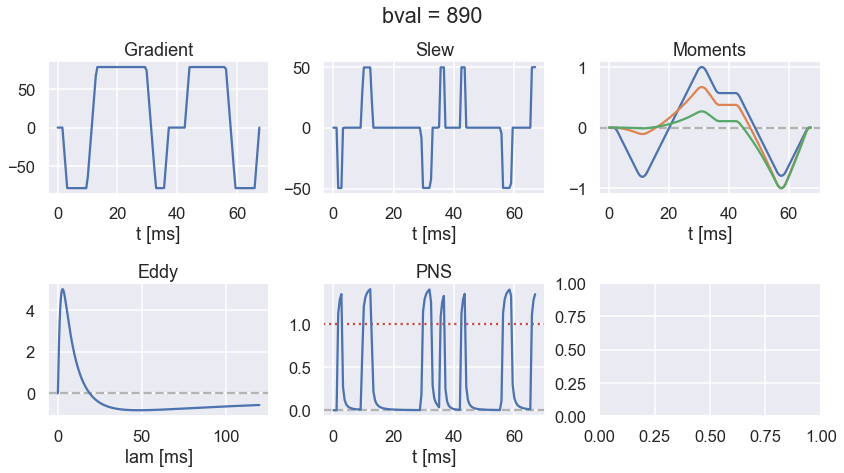

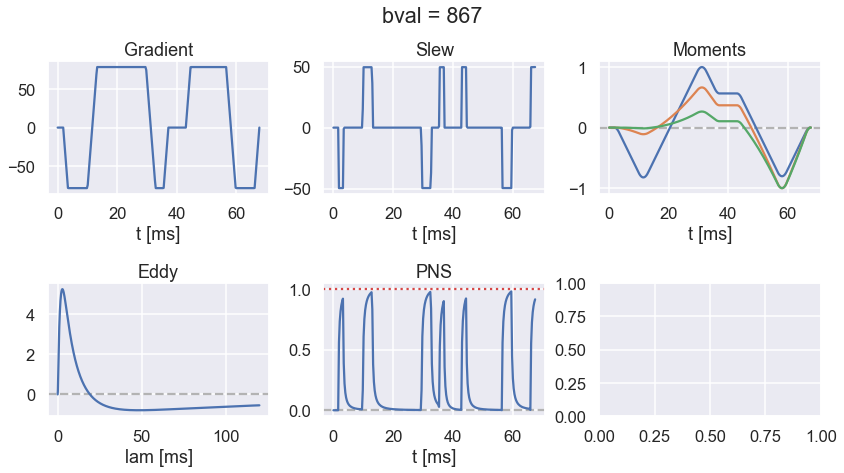

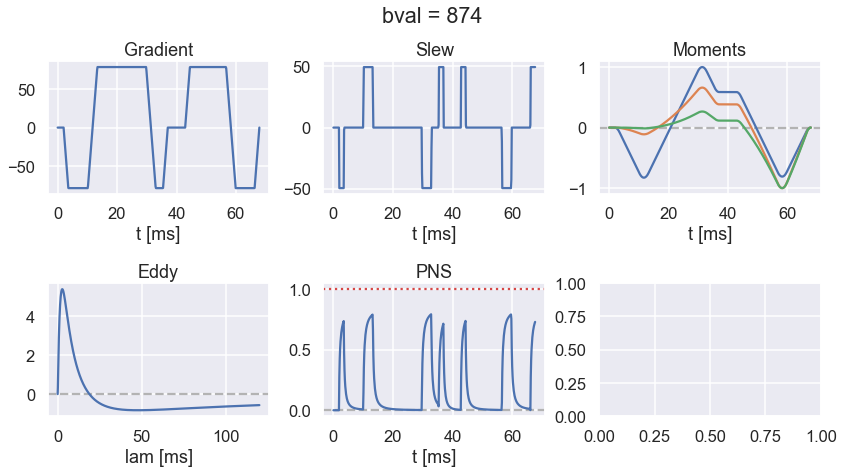

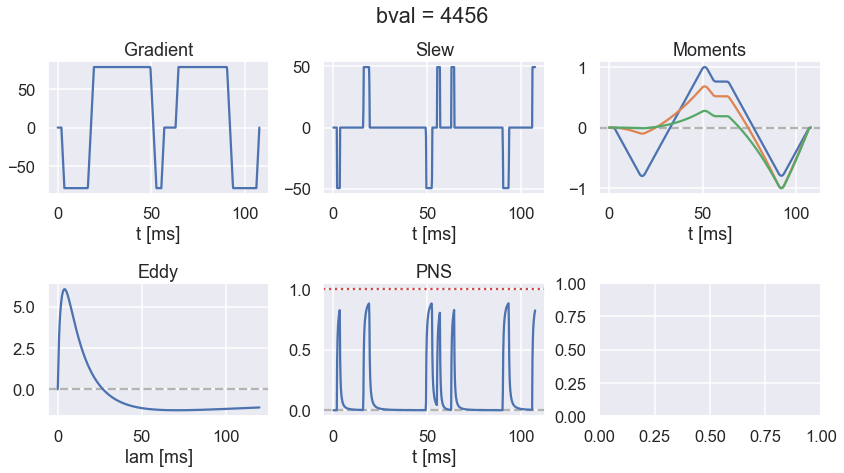

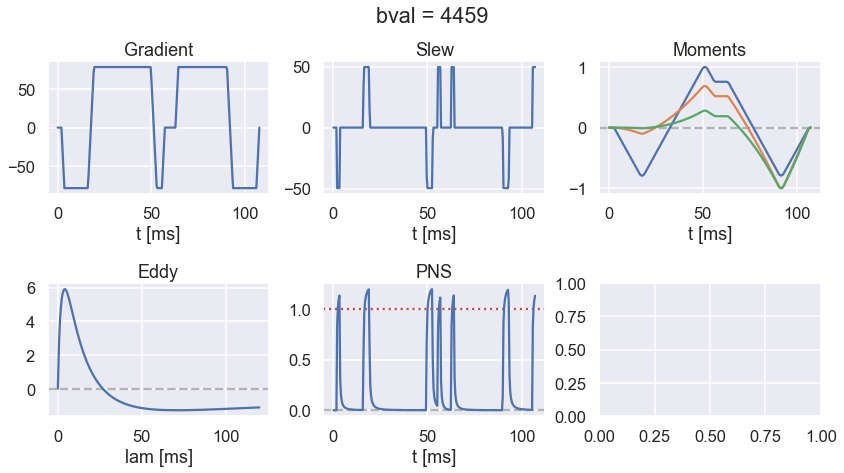

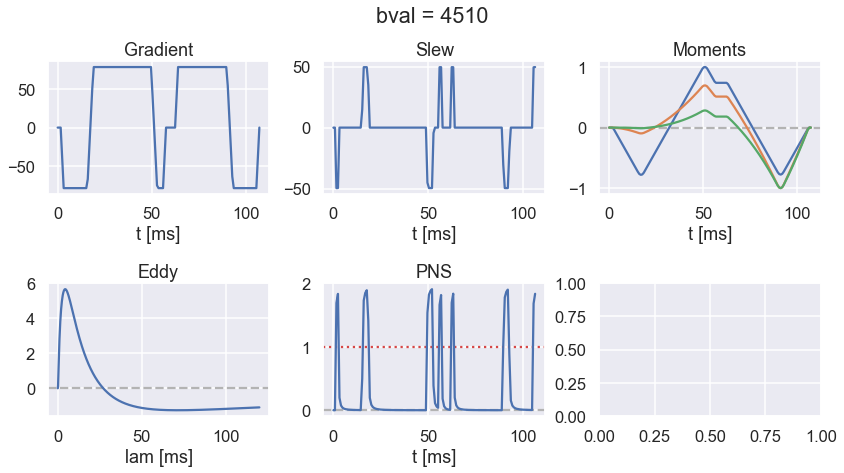

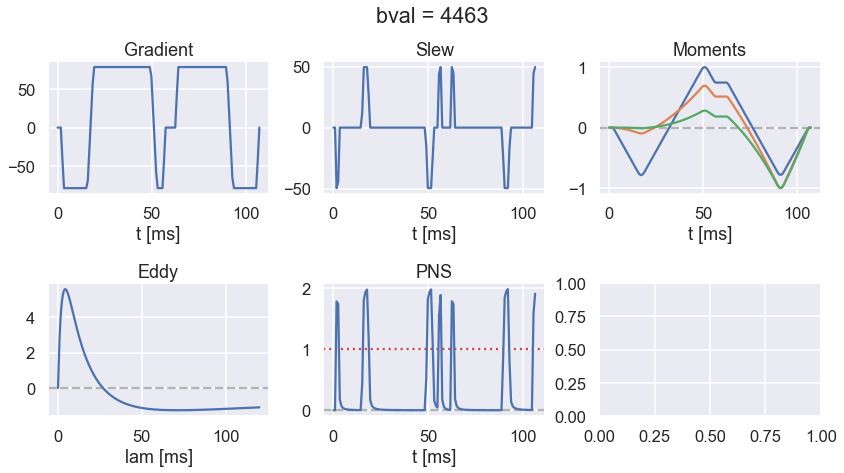

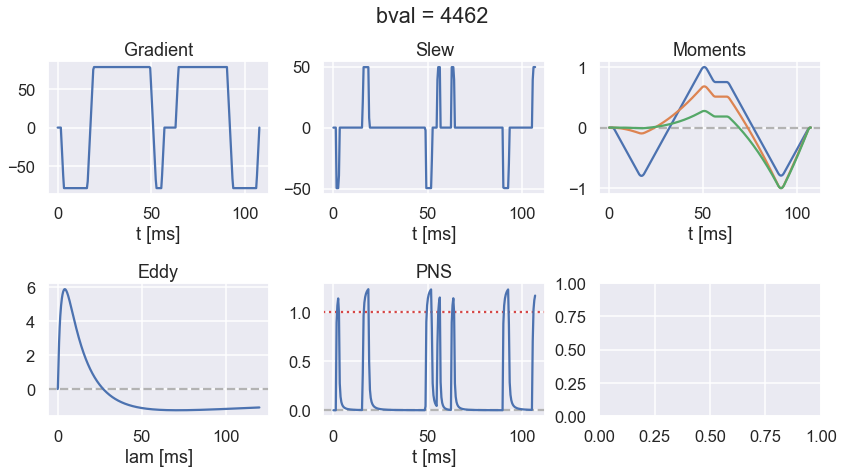

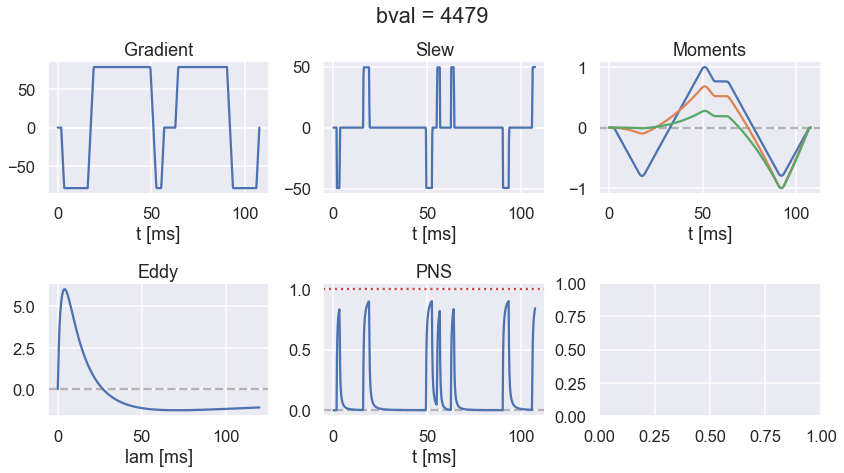

In [8]:
gmax = .08      # Gmax in [T/s]
smax = 50      # Slew max im [T/m/s]
TE = 44.4       # TE in [ms]
T_readout = 12  # [ms]
T_90 = 2        # [ms]
T_180 = 6       # [ms]
diffmode = 2    # diffmode =1 for beta-max, =2 for b-val max


for TE in [40.0, 80.0, 120.0]:
    
    dt_range = np.array([.2, .4, .8]) * 1.0e-3
    for dt in dt_range:

        testcase = make_testcase_simpdiff(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, dt=dt)
        all_testcase.append(testcase)
        plot_waveform(testcase['G'], TE, T_readout)

    N_range = np.array([128, 256, 512])
    for N in N_range:

        testcase = make_testcase_simpdiff(gmax, smax, MMT, TE, T_readout, T_90, T_180, diffmode, N=N)
        all_testcase.append(testcase)
        plot_waveform(testcase['G'], TE, T_readout)

In [9]:
import pathlib
import hdf5storage
filepath = './cases/diff_v1/MMT%d/' % MMT
pathlib.Path(filepath).mkdir(parents=True, exist_ok=True)
ii = 0
for testcase in all_testcase:
    hdf5storage.write(testcase, '.', filepath + 'case_%03d.h5' % ii, store_python_metadata = True, matlab_compatible=True)
    ii += 1

In [13]:
ii = 0
casefile = filepath + 'case_%03d.h5' % ii
print(casefile)
data = hdf5storage.read(filename=casefile)

./cases/diff_v1/MMT2/case_000.h5


In [15]:
data['params_in']

{'MMT': 2,
 'N': -1,
 'TE': 44.4,
 'T_180': 6,
 'T_90': 2,
 'T_readout': 12,
 'diffmode': 2,
 'dt': 0.0001,
 'gmax': 0.08,
 'smax': 200}

In [16]:
min(2,3)

2